In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [27]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler

In [28]:
df=pd.read_csv('points_table.csv')
df

,season,rank,name,short_name,matchesplayed,matcheswon,matcheslost,noresult,matchpoints,nrr,for,against
0,2023,1,Gujarat Titans,GT,14,10,4,0,20,0.809,2450/268.1,2326/279.2
1,2023,2,Chennai Super Kings,CSK,14,8,5,1,17,0.652,2369/254.3,2232/257.5
2,2023,3,Lucknow Super Giants,LSG,14,8,5,1,17,0.284,2253/255.2,2216/259.3
3,2023,4,Mumbai Indians,MI,14,8,6,0,16,-0.044,2592/270.3,2620/272.1
4,2023,5,Rajasthan Royals,RR,14,7,7,0,14,0.148,2419/272.1,2389/273.2
...,...,...,...,...,...,...,...,...,...,...,...,...
131,2008,4,Delhi Capitals,DC,14,7,6,1,15,0.342,2001/233.2,2031/246.4
132,2008,5,Mumbai Indians,MI,14,7,7,0,14,0.570,2080/249.1,2096/269.3
133,2008,6,Kolkata Knight Riders,KKR,14,6,7,1,13,-0.147,1845/242.4,1718/221.4
134,2008,7,Royal Challengers Bangalore,RCB,14,4,10,0,8,-1.160,1983/272.4,2205/261.3


In [29]:
warnings.filterwarnings("ignore")

In [30]:
# User specifies a team
selected_team = "Mumbai Indians"

In [31]:
# Filter the rank of the selected team
team_data = df[df["name"] == selected_team][["season", "rank"]].set_index("season")

In [32]:
# Ensure a continuous time series by reindexing
team_data = team_data.sort_index()

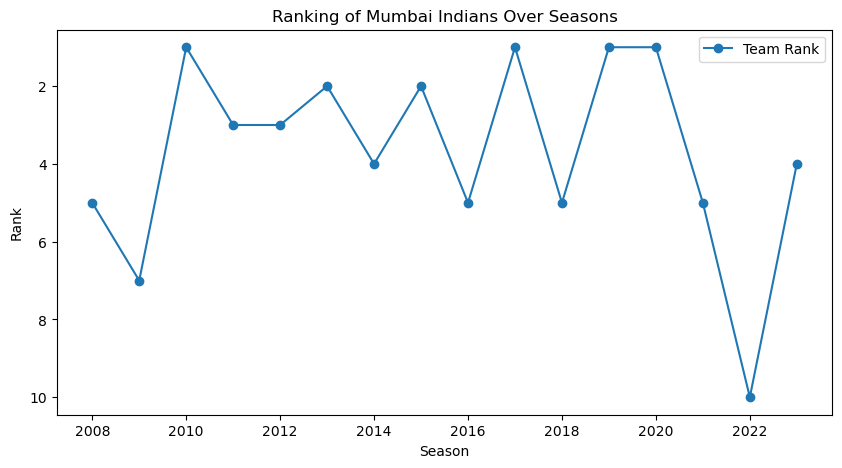

In [33]:
# Step 1: Visualize the Data
plt.figure(figsize=(10, 5))
plt.plot(team_data.index, team_data["rank"], marker="o", label="Team Rank")
plt.title(f"Ranking of {selected_team} Over Seasons")
plt.xlabel("Season")
plt.ylabel("Rank")
plt.gca().invert_yaxis() 
plt.legend()
plt.show()

In [34]:
# Step 2: Check Stationarity
def test_stationarity(series):
    adf_result = adfuller(series)
    print("ADF Statistic:", adf_result[0])
    print("p-value:", adf_result[1])
    print("Critical Values:", adf_result[4])

test_stationarity(team_data["rank"])

ADF Statistic: -2.0190712386042264
p-value: 0.2782741335245569
Critical Values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}


In [35]:
# Step 4: Fit ARIMA Model
model = ARIMA(team_data["rank"], order=(1, 1, 0))  # (p, d, q)
arima_model = model.fit()

In [36]:
# Step 5: Forecast Future Ranks
forecast = arima_model.get_forecast(steps=3)  # Predict next 3 seasons
forecast_index = range(team_data.index[-1] + 1, team_data.index[-1] + 4)
forecast_rank = forecast.predicted_mean

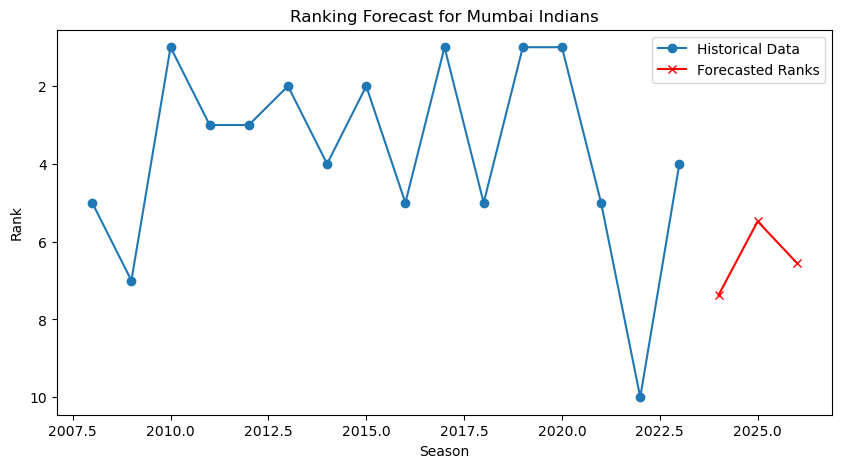

In [37]:
# Step 6: Visualize Forecasts
plt.figure(figsize=(10, 5))
plt.plot(team_data.index, team_data["rank"], marker="o", label="Historical Data")
plt.plot(forecast_index, forecast_rank, marker="x", label="Forecasted Ranks", color="red")
plt.title(f"Ranking Forecast for {selected_team}")
plt.xlabel("Season")
plt.ylabel("Rank")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

In [38]:
# Step 7: Print Forecasted Ranks
forecast_df = pd.DataFrame({"Season": forecast_index, "Forecasted Rank": forecast_rank})
print(forecast_df)

    Season  Forecasted Rank
16    2024         7.376980
17    2025         5.476314
18    2026         6.546066
